# Linear Regression

## Part 1 - Data Preprocessing

### Importing the dataset and libraries

In [2]:
# Import necessary libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
%matplotlib inline
from pandas import read_csv
#Lets load the dataset and sample some
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Suppress warnings for clean output
import warnings
warnings.filterwarnings('ignore')

**pandas (pd) and numpy (np):** Tools for working with data and numbers in a structured way.
<br>
<br>
**matplotlib.pyplot (plt) and seaborn (sns):** Used to create graphs and visualize data.
<br>
<br>
**scikit-learn tools:**
<br>
<br>
**train_test_split: Splits the data into two parts:** training and testing.
<br>
<br>
**StandardScaler:** Helps to scale/standardize the data so it can be used effectively in the model.
<br>
<br>
**LinearRegression:** The actual algorithm that builds a model to predict values.
mean_squared_error (MSE) and r2_score (R²): Measures to evaluate how well the model is doing.
<br>
<br>
**warnings.filterwarnings('ignore'):** Suppresses unnecessary warnings for a cleaner output.
<br><br>


### Loading and Understanding the Dataset

In [3]:
# [rows,columns]
data = pd.read_csv('clearboston.csv')
data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
data.head(5) #display 5 rows of dataset

#10,000 rows
#data points collected from a combined cycle power plant over six years
#5 columns: AT ambient temp,V exhaust vacuum, AP ambient pressure, RH relative humdity, PE net hourly  electrical energy output
# independent variables: AT, V, AP and RH
# dependent variable: PE

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Loads the data from a CSV file into a **dataframe** (a table of data) and displays it.

In [5]:
# Check dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Displays information about the data: **column names, data types, and if any data is missing.**

In [6]:
# Check for any missing values in the dataset
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Checks for any missing values in the data.


In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


From get-go, two data coulmns show interesting summeries. They are : ZN (proportion of residential land zoned for lots over 25,000 sq.ft.) with 0 for 25th, 50th percentiles. Second, CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise) with 0 for 25th, 50th and 75th percentiles. These summeries are understandable as both variables are conditional + categorical variables. First assumption would be that these coulms may not be useful in regression task such as predicting MEDV (Median value of owner-occupied homes).

Another interesing fact on the dataset is the max value of MEDV. From the original data description, it says: Variable #14 seems to be censored at 50.00 (corresponding to a median price of $50,000). Based on that, values above 50.00 may not help to predict MEDV. Let's plot the dataset and see interesting trends/stats.

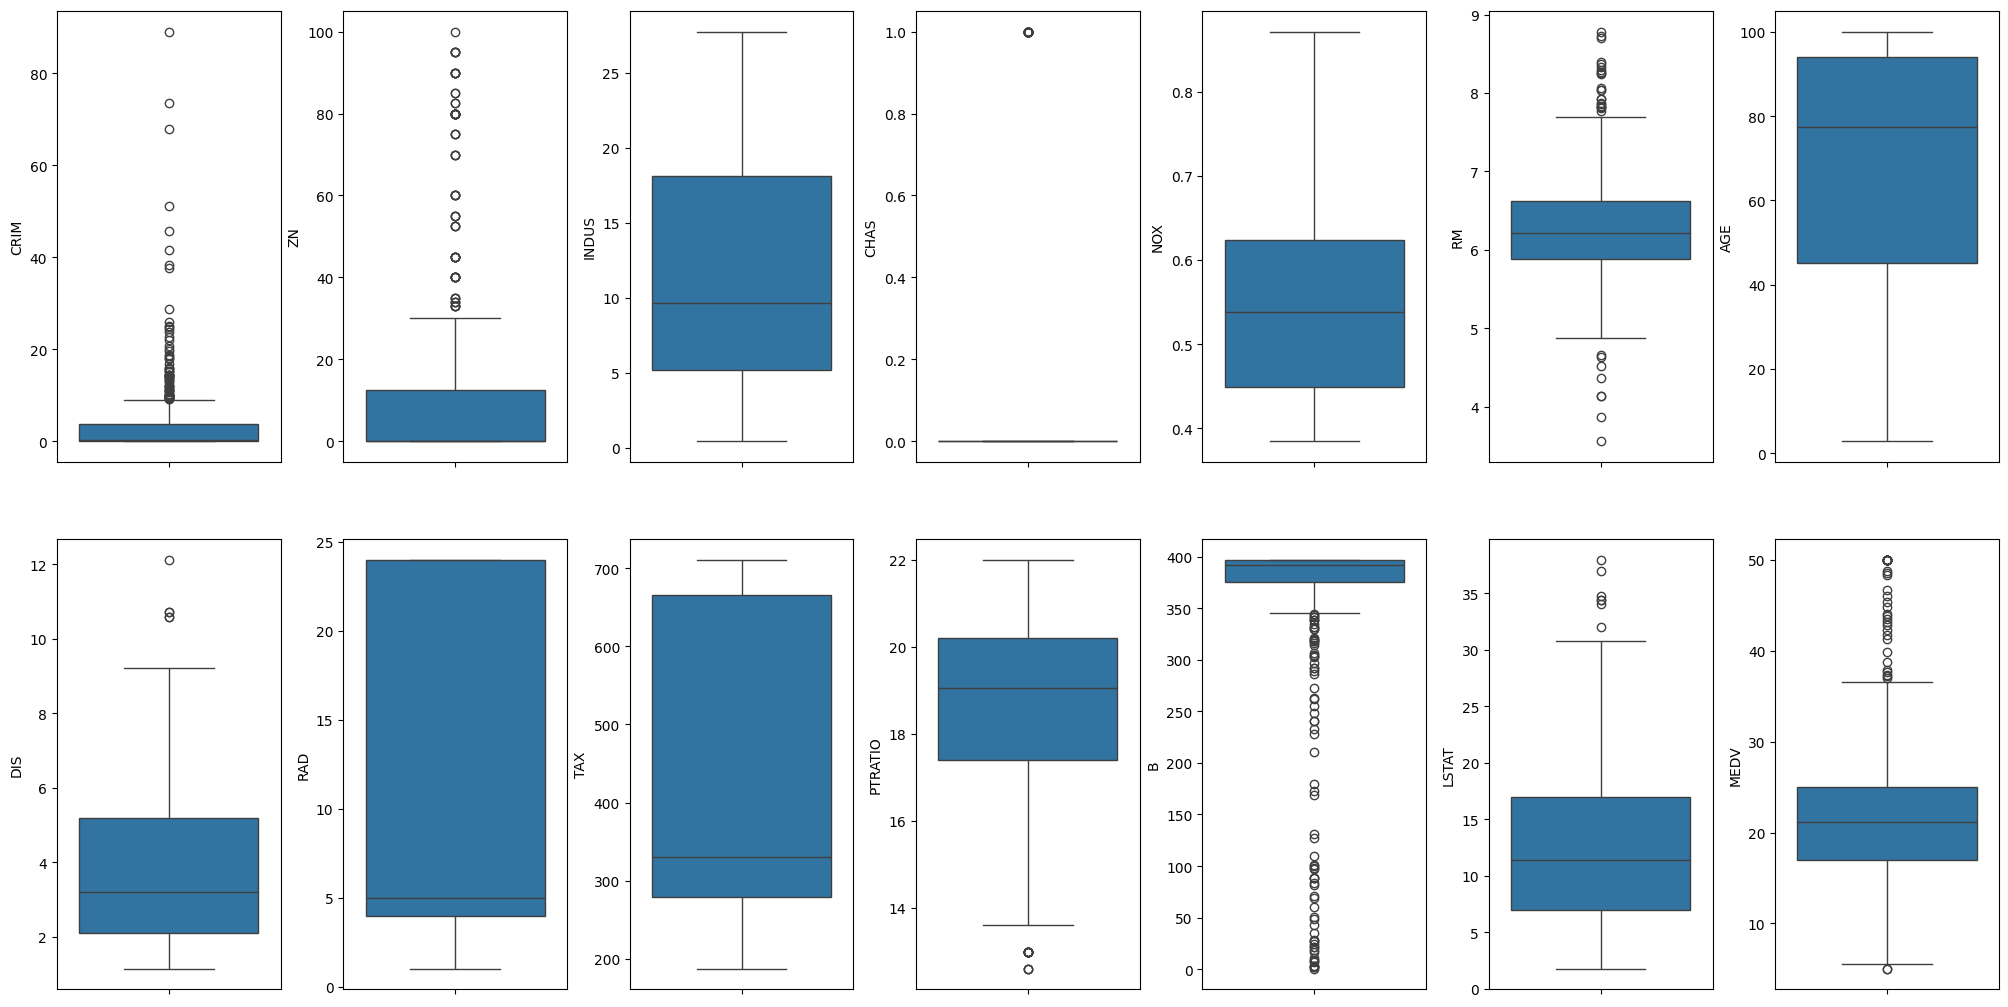

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Columns like CRIM, ZN, RM, B seems to have outliers. Let's see the outliers percentage in every column.

In [9]:
for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


### Removing MEDV outliers (MEDV = 50.0) before plotting more distributions

In [10]:
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))

(490, 14)


### Visualization of features plus MEDV distributions

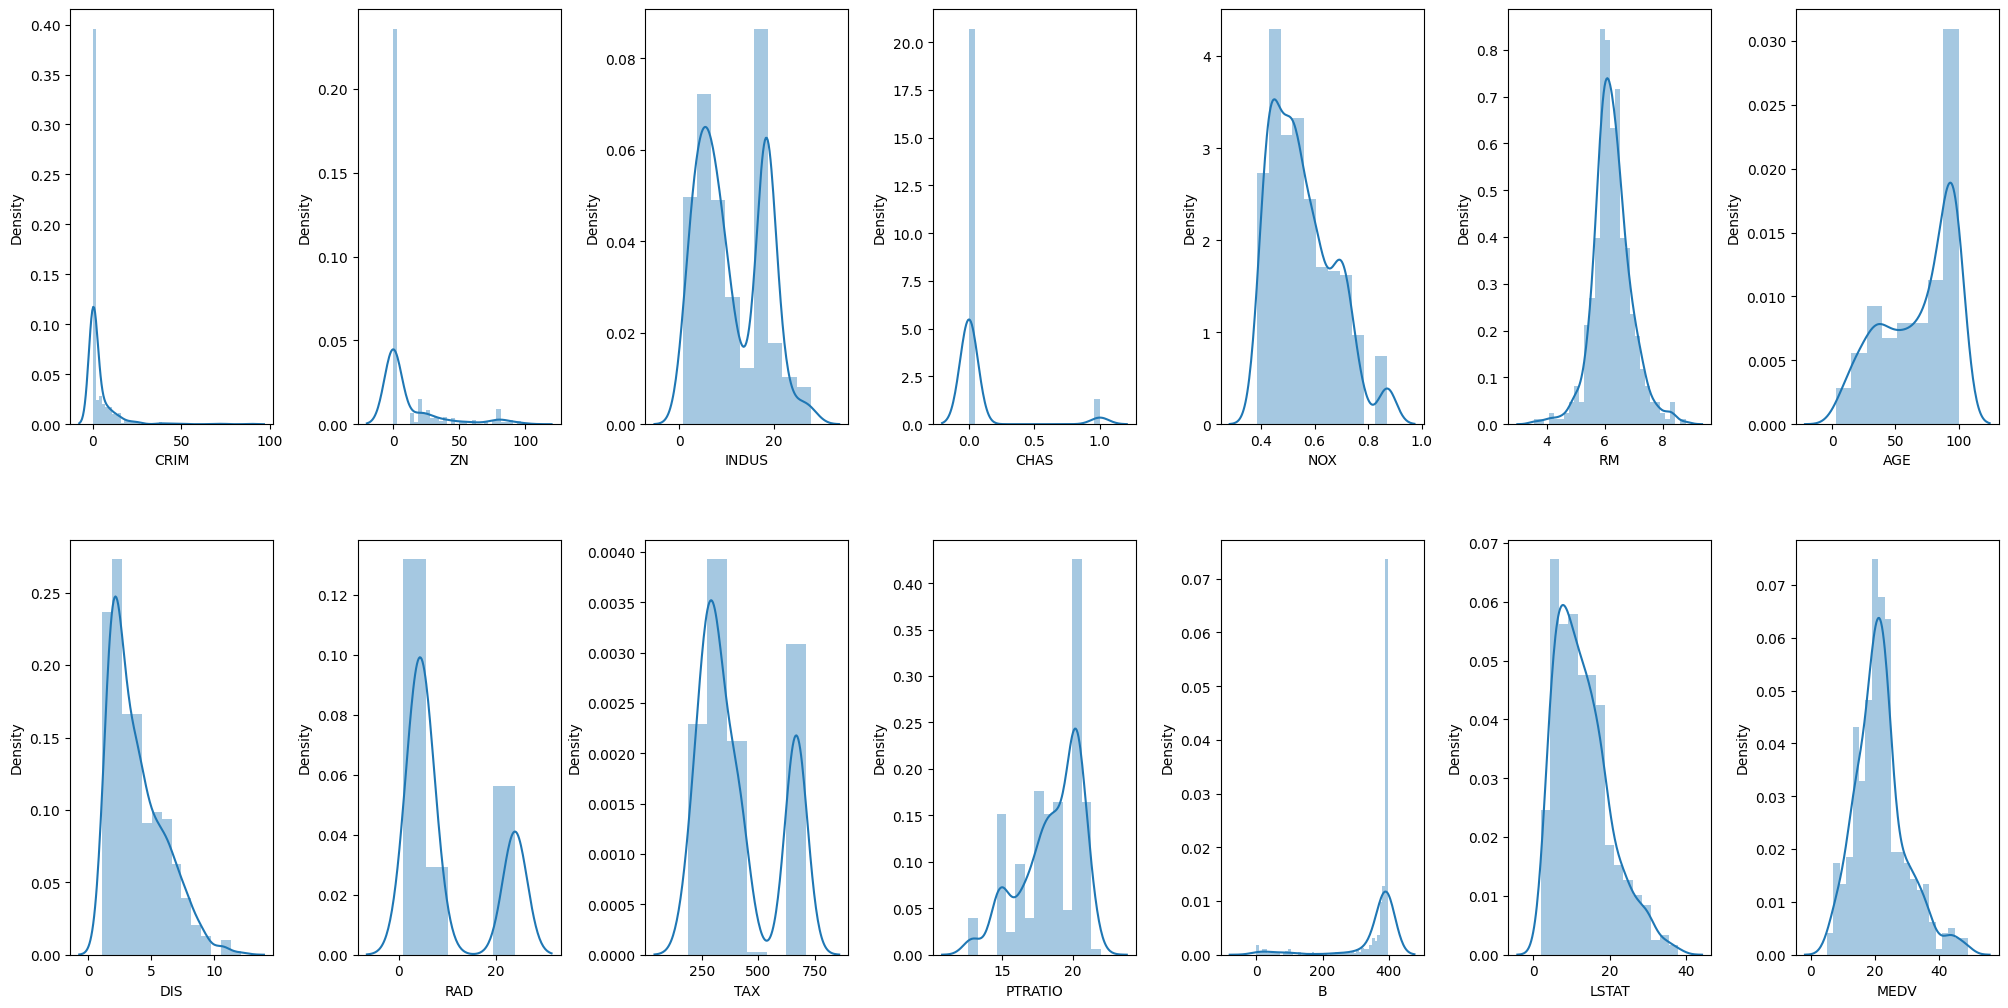

In [11]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have norma or bimodel ditribution of data except CHAS (which is a discrete variable).

Now let's plot the pairwise correlation on data.

<Axes: >

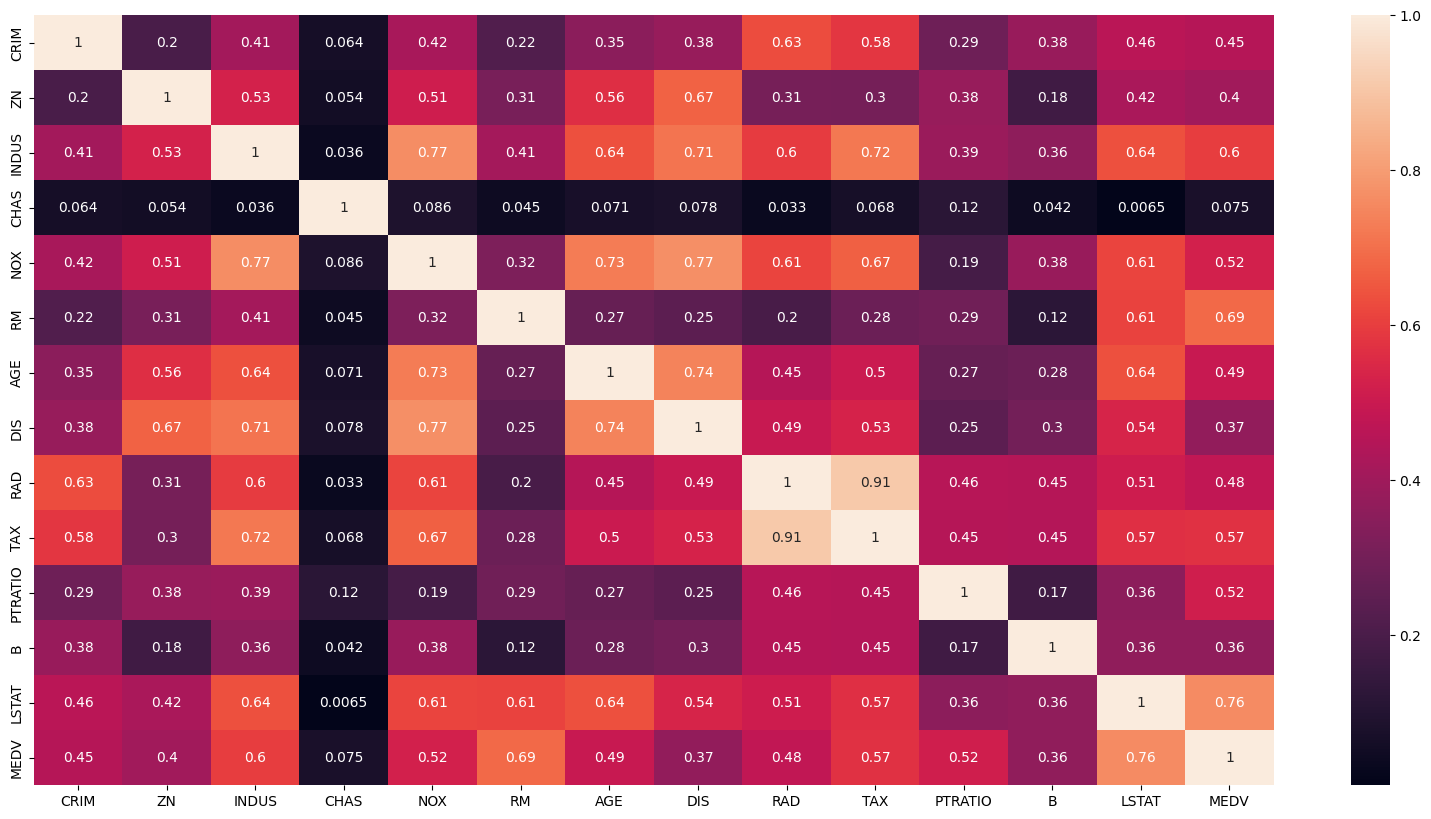

In [12]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Let's plot these columns against MEDV.

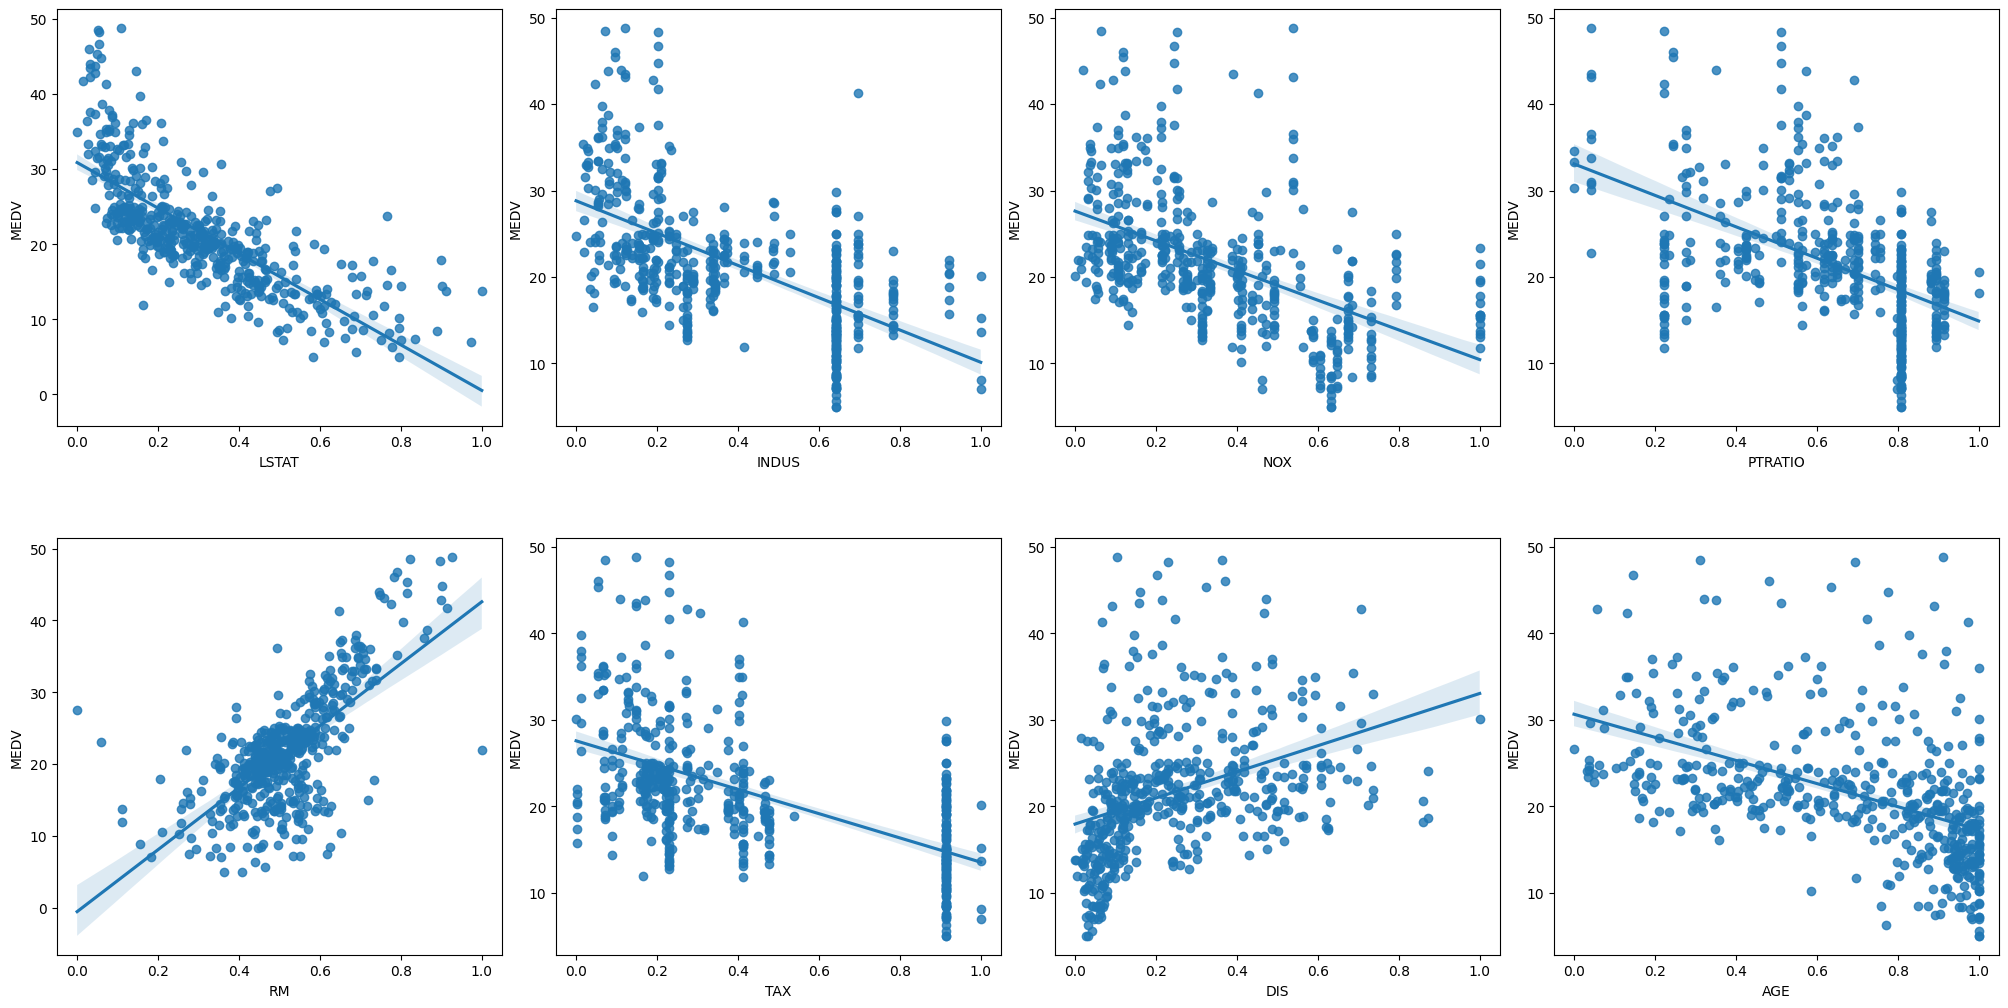

In [13]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

So with these analysis, we may try predict MEDV with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE' features. Let's try to remove the skewness of the data trough log transformation.

In [14]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

### Separating the Data (Features and Target)

In [15]:
# Extract features and target
X = data.drop('MEDV', axis=1)
y = data['MEDV']
#X: All the columns except# "MEDV" (the home price) are considered features (factors that help predict the home price).
#y: The "MEDV" column is th#e target (what we're trying to predict: the home price).

### Splitting the Data for Training and Testing


In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

Splits the data into two parts:
<br>
<br>
**Training data** (80% of the total): Used to train the model.
<br>
<br>
**Testing data** (20% of the total): Used to see how well the model performs on data it hasn’t seen before.
<br>
<br>
**random_state=42:** Ensures that the splitting is the same each time for consistent results.
<br>
<br>


In [17]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
362,3.67822,0.0,18.10,0,0.770,5.362,96.2,2.1036,24,666.0,20.2,380.79,10.19
211,0.37578,0.0,10.59,1,0.489,5.404,88.6,3.6650,4,277.0,18.6,395.24,23.98
478,10.23300,0.0,18.10,0,0.614,6.185,96.7,2.1705,24,666.0,20.2,379.70,18.03
273,0.22188,20.0,6.96,1,0.464,7.691,51.8,4.3665,3,223.0,18.6,390.77,6.58
142,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403.0,14.7,396.90,26.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,12.04820,0.0,18.10,0,0.614,5.648,87.6,1.9512,24,666.0,20.2,291.55,14.10
406,20.71620,0.0,18.10,0,0.659,4.138,100.0,1.1781,24,666.0,20.2,370.22,23.34
143,4.09740,0.0,19.58,0,0.871,5.468,100.0,1.4118,5,403.0,14.7,396.90,26.42
249,0.19073,22.0,5.86,0,0.431,6.718,17.5,7.8265,7,330.0,19.1,393.74,6.56


In [18]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188.0,19.1,377.67,14.27
341,0.01301,35.0,1.52,0,0.442,7.241,49.3,7.0379,1,284.0,15.5,394.74,5.49
397,7.67202,0.0,18.10,0,0.693,5.747,98.9,1.6334,24,666.0,20.2,393.10,19.92
188,0.12579,45.0,3.44,0,0.437,6.556,29.1,4.5667,5,398.0,15.2,382.84,4.56
53,0.04981,21.0,5.64,0,0.439,5.998,21.4,6.8147,4,243.0,16.8,396.90,8.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,1.25179,0.0,8.14,0,0.538,5.570,98.1,3.7979,4,307.0,21.0,376.57,21.02
51,0.04337,21.0,5.64,0,0.439,6.115,63.0,6.8147,4,243.0,16.8,393.97,9.43
68,0.13554,12.5,6.07,0,0.409,5.594,36.8,6.4980,4,345.0,18.9,396.90,13.09
113,0.22212,0.0,10.01,0,0.547,6.092,95.4,2.5480,6,432.0,17.8,396.90,17.09


In [19]:
y_train

362    20.8
211    19.3
478    14.6
273    35.2
142    13.4
       ... 
422    20.8
406    11.9
143    15.6
249    26.2
111    22.8
Name: MEDV, Length: 392, dtype: float64

In [20]:
y_test

121    20.3
341    32.7
397     8.5
188    29.8
53     23.4
       ... 
20     13.6
51     20.5
68     17.4
113    18.7
109    19.4
Name: MEDV, Length: 98, dtype: float64

In [21]:
# Initialize and fit the StandardScaler
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are DataFrames
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Standardizes (scales) the data so that all features have the same scale (important for models like this one).
<br>
<br>
**fit_transform:** Learns from the training data and scales it.
<br>
<br>
**transform:** Scales the test data using the same transformation applied to the training data.

## Part 2 - Building and training the model

### Building and Training the Model

In [22]:
# linear_model is the module
# LinearRegression is a class is defining that LinearRegression is a class within the linear_model module. 
# It indicates that LinearRegression is a blueprint or template for creating objects that represent linear regression models.
# Class is a pre-coded blueprint of something we want to build from which objects are created.
# Initialize and train the Linear Regression model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
# fit is a method inside LinearRegression class - they are like functions.
model.fit(X_train_scaled, y_train)

LinearRegression()

**model = LinearRegression():** Creates a new linear regression model.
<br>
<br>
**model.fit(X_train_scaled, y_train):** Trains the model using the scaled training data.

### Inference

In [23]:
cv_predictions = model.predict(X_test_scaled)
cv_predictions

array([22.00002334, 30.22778926, 15.45898302, 31.42471775, 25.07994535,
       11.33356825, 19.73040387, 20.56733803, 19.11092017, 20.49274101,
       34.87800177, 16.79923194, 18.95479638, 17.53210658, 27.91658283,
       19.9684755 , 18.5377881 , 25.42109574, 24.1258289 , 22.71857893,
       33.78527595, 16.1990909 , 28.10882208, 18.67394078, 26.11672838,
       31.70546996, 32.13435568, 12.95943794,  6.846938  , 24.49702036,
       23.07939289, 32.61243096, 20.61115022, 34.68024028, 12.89061795,
       25.92387311, 22.905298  , 34.32333226, -2.50872707, 22.94046328,
       20.82669219, 16.00090402, 22.51795807,  9.36228527, 16.0116655 ,
       27.03531145, 20.47924593, 27.63322638, 27.46950921, 33.23282416,
       18.35547714, 22.53549983, 21.94824465, 23.58294746, 15.37841408,
       19.17852741, 20.37978889, 25.97234453, 18.5790762 , 20.50381048,
       25.65235955, 23.74959323, 29.04823817, 34.27694792, 11.88147073,
       35.31808139, 26.26846864, 14.6367723 , 22.67499552, 31.47

**cv_predictions:** The model predicts home prices based on the test data.

#### Making Predictions on New Data

In [24]:
from sklearn.preprocessing import StandardScaler

# Convert DataFrames to NumPy arrays
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

new_data = np.array([[0.02731, 18.0, 2.31, 0, 0.538, 6.575, 65.2, 4.0900, 1, 296.0, 15.3, 396.90, 4.98]])
new_data_scaled = scaler.transform(new_data)
predicted_value = model.predict(new_data_scaled)
print(f"Predicted Value: {predicted_value[0]:.2f}")

Predicted Value: 29.27


**new_data:** Inputs a new set of features for a house (in the same format as the original data).
<br><br>
**predicted_value:** Uses the trained model to predict the price of this new house, which is then printed.


## Part 3: Evaluating the Model

### Cross-Validation Mean Squared Error

In [25]:
# Perform cross-validation
cv_predictions = model.predict(X_test_scaled)
cv_mse = mean_squared_error(y_test, cv_predictions)
print(f"Cross-Validation Mean Squared Error: {cv_mse:.4f}")

Cross-Validation Mean Squared Error: 8.1495



**cv_mse:** Calculates the average squared difference between the actual and predicted home prices. A lower number is better.

### R-Squared

In [26]:
r2 = r2_score(y_test, cv_predictions)
print(f"R-squared: {r2:.4f}")

R-squared: 0.8284


**r2_score (R²):** Tells us how well the model explains the variation in home prices. A value closer to 1 means better performance.

### Adjusted R-Squared

In [27]:
k = X_test_scaled.shape[1]
n = X_test_scaled.shape[0]
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
print("Adjusted R-squared:")
adj_r2

Adjusted R-squared:


0.8018392248839944

### Getting Coefficients and Intercept

In [28]:
print("Coefficients:")
print (model.coef_)

print("Intercept:")
print(model.intercept_)

Coefficients:
[-0.87543382  0.79443289 -0.19567869  0.05757207 -1.62365832  2.51282492
 -0.58033905 -2.56563634  2.42164377 -2.43389804 -1.94628352  0.82374275
 -2.55574872]
Intercept:
21.66811224489796


### Comparing Actual vs Predicted Prices

In [29]:
results_df = pd.DataFrame({
    'Actual Values': y_test.values,
    'Predicted Values': cv_predictions
})
results_df.head(10)

,Actual Values,Predicted Values
0,20.3,22.000023
1,32.7,30.227789
2,8.5,15.458983
3,29.8,31.424718
4,23.4,25.079945
5,12.0,11.333568
6,21.4,19.730404
7,22.2,20.567338
8,18.2,19.110920
9,20.5,20.492741


Creates a table showing the **actual** home prices vs. the **predicted** prices for the first 10 test cases.

### Visualizing Predictions

#### Scatter Plot 

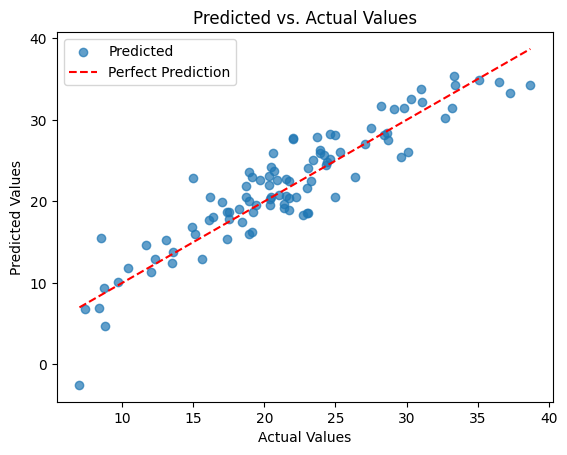

In [30]:
# Plotting the linear regression line
plt.scatter(y_test, cv_predictions, alpha=0.7, label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()


**Scatter Plot:** Shows how close the predicted values are to the actual values.
<br><br>
**Red Line:** Represents "perfect prediction," where the predicted value would exactly match the actual value.


#### Residual Plot

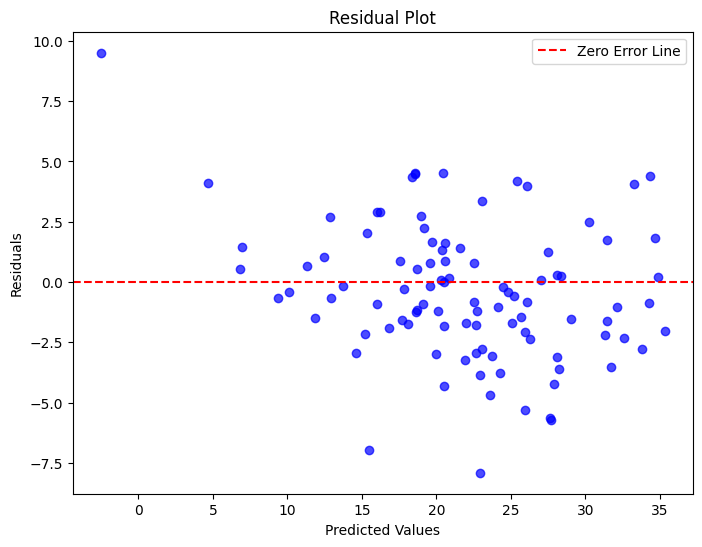

In [31]:
# Calculate residuals (difference between actual and predicted values)
residuals = y_test - cv_predictions

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(cv_predictions, residuals, alpha=0.7, color='blue')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error Line')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

The **residuals (errors)** show how far the predictions are from the actual values.
<br><br>
The **red line** at **0** represents perfect predictions.
<br>
<br>
Points **scattered randomly** around this line indicate that the model’s **errors are random**, meaning the model captures the pattern well. If there’s a pattern (like a curve), it suggests the model has some bias or is missing important information.
